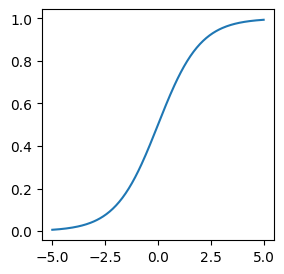

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,sigmoid(z))
plt.show()

In [2]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_int = tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                   distribution='uniform')
dense = tf.keras.layers.Dense(50,activation='sigmoid',
                              kernel_initializer=he_avg_int)

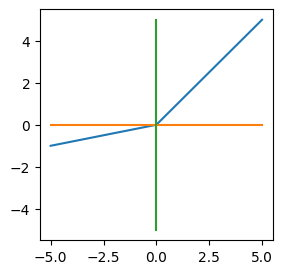

In [4]:
def leaky_relu(z,alpha):
    return np.maximum(alpha * z,z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,leaky_relu(z,0.2))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

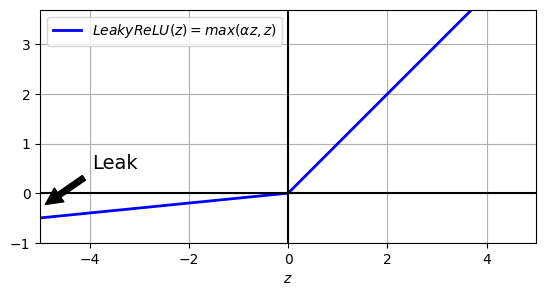

In [5]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) #default alpha = 0.3
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

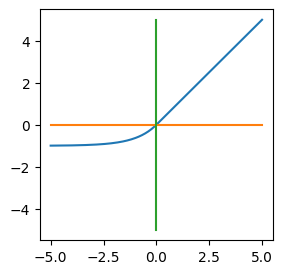

In [8]:
def elu(z,alpha=1):
    return np.where(z<0,alpha * (np.exp(z)-1),z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,elu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50,activation='elu',kernel_initializer='he_normal')

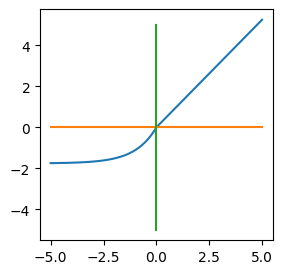

In [10]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,selu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

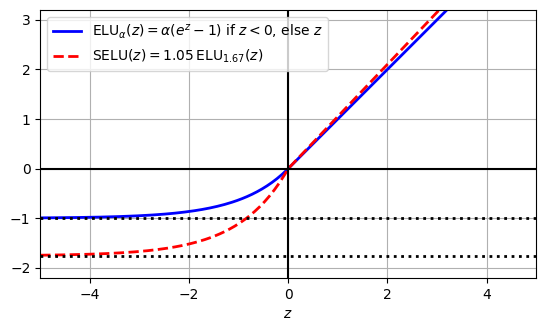

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [12]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation='selu',
                                    kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
pixel_means = X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5405 - loss: 1.1979 - val_accuracy: 0.7210 - val_loss: 0.7889
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6371 - loss: 0.9586 - val_accuracy: 0.3886 - val_loss: 1.4740
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6699 - loss: 0.8948 - val_accuracy: 0.7500 - val_loss: 0.7183
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7607 - loss: 0.6594 - val_accuracy: 0.8002 - val_loss: 0.5755
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7819 - loss: 0.5950 - val_accuracy: 0.7992 - val_loss: 0.5542


In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2622 - loss: 1.9003 - val_accuracy: 0.4114 - val_loss: 1.5732
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3850 - loss: 1.6062 - val_accuracy: 0.3588 - val_loss: 1.6601
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5109 - loss: 1.1921 - val_accuracy: 0.5644 - val_loss: 0.9475
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6270 - loss: 0.9035 - val_accuracy: 0.6852 - val_loss: 0.8494
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6764 - loss: 0.7945 - val_accuracy: 0.7298 - val_loss: 0.7166


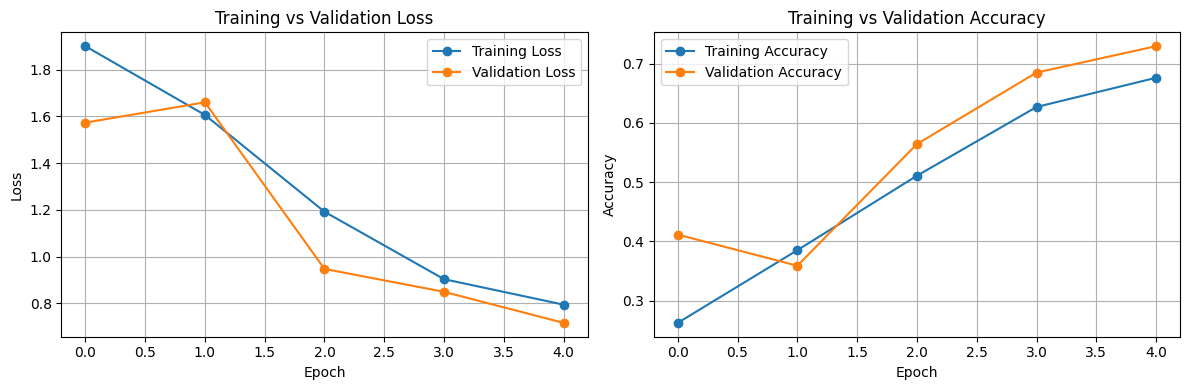

In [23]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 4))

# ---- LOSS ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- ACCURACY ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

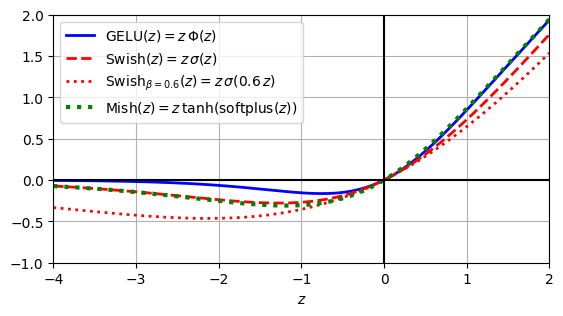

In [24]:
def swish(z,beta=1):
    return z * sigmoid(beta*z)
def approx_gelu(z):
    return swish(z,beta=1.702)
def softplus(z):
    return np.log(1+np.exp(z))
def mish(z):
    return z * np.tanh(softplus(z))
z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [28]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8117 - loss: 0.5435 - val_accuracy: 0.8508 - val_loss: 0.4041
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8611 - loss: 0.3932 - val_accuracy: 0.8644 - val_loss: 0.3712


In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7979 - loss: 0.6031 - val_accuracy: 0.8410 - val_loss: 0.4325
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8522 - loss: 0.4223 - val_accuracy: 0.8552 - val_loss: 0.3917


In [33]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [34]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [35]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8693 - loss: 0.3701 - val_accuracy: 0.8662 - val_loss: 0.3671
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8771 - loss: 0.3466 - val_accuracy: 0.8674 - val_loss: 0.3601


In [36]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model.fit(X_train_A,y_train_A,epochs=20,
                    validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7989 - loss: 0.6072 - val_accuracy: 0.8980 - val_loss: 0.2885
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0.2835 - val_accuracy: 0.9135 - val_loss: 0.2559
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9165 - loss: 0.2442 - val_accuracy: 0.9163 - val_loss: 0.2424
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9250 - loss: 0.2200 - val_accuracy: 0.9185 - val_loss: 0.2341
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9308 - loss: 0.2018 - val_accuracy: 0.9203 - val_loss: 0.2288
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9353 - loss: 0.1872 - val_accuracy: 0.9200 - val_loss: 0.2257
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9397 - loss: 0.1750 - val_accuracy: 0.9215 - val_loss: 0.2238
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9440 - loss: 0.1642 - 

In [37]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.3884 - val_accuracy: 0.9486 - val_loss: 0.2419
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9524 - loss: 0.2033 - val_accuracy: 0.9535 - val_loss: 0.1744
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9542 - loss: 0.1653 - val_accuracy: 0.9555 - val_loss: 0.1532
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9562 - loss: 0.1508 - val_accuracy: 0.9585 - val_loss: 0.1429
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9571 - loss: 0.1430 - val_accuracy: 0.9585 - val_loss: 0.1367
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9576 - loss: 0.1379 - val_accuracy: 0.9604 - val_loss: 0.1324
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1340 - val_accuracy: 0.9614 - val_loss: 0.1291
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1310 - val_accuracy: 0.

[0.12133987247943878, 0.9635000228881836]

In [38]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [39]:
tf.random.set_seed(42)

In [40]:
model_A_clone =tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [41]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [42]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

In [43]:
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3448 - loss: 0.7372 - val_accuracy: 0.3986 - val_loss: 0.7185
Epoch 2/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5200 - loss: 0.6906 - val_accuracy: 0.6034 - val_loss: 0.6749
Epoch 3/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6751 - loss: 0.6508 - val_accuracy: 0.7112 - val_loss: 0.6371
Epoch 4/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7708 - loss: 0.6160 - val_accuracy: 0.7864 - val_loss: 0.6042
Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9333 - loss: 0.3555 - val_accuracy: 0.9515 - val_loss: 0.2327
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9532 - loss: 0.1969 - val_accuracy: 0.9545 - val_loss: 0.1705
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.1620 - val_accuracy: 0.9545 - val_loss: 0.1502
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9567 - loss: 0.1480 - val_accuracy: 0.9545

In [44]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9605 - loss: 0.1218


[0.12178508192300797, 0.9605000019073486]

In [45]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(100,activation='relu',
                              kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid,y_valid))

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [47]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5924 - loss: 1.2873 - val_accuracy: 0.7274 - val_loss: 0.8482
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7511 - loss: 0.7571 - val_accuracy: 0.7782 - val_loss: 0.6726
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7864 - loss: 0.6415 - val_accuracy: 0.8018 - val_loss: 0.5984
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8038 - loss: 0.5833 - val_accuracy: 0.8118 - val_loss: 0.5571
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8149 - loss: 0.5475 - val_accuracy: 0.8178 - val_loss: 0.5302
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8214 - loss: 0.5224 - val_accuracy: 0.8214 - val_loss: 0.5111
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8271 - loss: 0.5035 - val_accuracy: 0.8260 - val_loss: 0.4966
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8314 - loss: 0.4887 - 

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [49]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7598 - loss: 0.6993 - val_accuracy: 0.8104 - val_loss: 0.5115
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8346 - loss: 0.4727 - val_accuracy: 0.8260 - val_loss: 0.4670
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8492 - loss: 0.4286 - val_accuracy: 0.8366 - val_loss: 0.4375
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8599 - loss: 0.4008 - val_accuracy: 0.8454 - val_loss: 0.4151
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.3806 - val_accuracy: 0.8526 - val_loss: 0.3992
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3643 - val_accuracy: 0.8564 - val_loss: 0.3881
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.3510 - val_accuracy: 0.8566 - val_loss: 0.3794
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8788 - loss: 0.3394 - 

In [50]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [51]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7659 - loss: 0.6785 - val_accuracy: 0.8258 - val_loss: 0.4927
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8389 - loss: 0.4601 - val_accuracy: 0.8400 - val_loss: 0.4433
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.4170 - val_accuracy: 0.8468 - val_loss: 0.4183
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3900 - val_accuracy: 0.8522 - val_loss: 0.3985
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8682 - loss: 0.3695 - val_accuracy: 0.8564 - val_loss: 0.3878
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3534 - val_accuracy: 0.8594 - val_loss: 0.3773
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3402 - val_accuracy: 0.8640 - val_loss: 0.3700
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8819 - loss: 0.3287 - 

In [52]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [53]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6879 - loss: 1.0034 - val_accuracy: 0.7792 - val_loss: 0.6728
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7904 - loss: 0.6301 - val_accuracy: 0.8090 - val_loss: 0.5770
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8122 - loss: 0.5645 - val_accuracy: 0.8186 - val_loss: 0.5347
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8217 - loss: 0.5297 - val_accuracy: 0.8270 - val_loss: 0.5089
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8281 - loss: 0.5071 - val_accuracy: 0.8308 - val_loss: 0.4916
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8332 - loss: 0.4906 - val_accuracy: 0.8334 - val_loss: 0.4789
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8375 - loss: 0.4777 - val_accuracy: 0.8364 - val_loss: 0.4687
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8407 - loss: 0.4676 - 

In [54]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [55]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8131 - loss: 0.5144 - val_accuracy: 0.8336 - val_loss: 0.4454
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8586 - loss: 0.3933 - val_accuracy: 0.8474 - val_loss: 0.4287
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3670 - val_accuracy: 0.8602 - val_loss: 0.4094
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.3557 - val_accuracy: 0.8668 - val_loss: 0.4059
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8785 - loss: 0.3466 - val_accuracy: 0.8588 - val_loss: 0.4730
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8794 - loss: 0.3460 - val_accuracy: 0.8488 - val_loss: 0.5393
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8823 - loss: 0.3427 - val_accuracy: 0.8676 - val_loss: 0.4761
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8834 - loss: 0.3396 - 

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [57]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8191 - loss: 0.5058 - val_accuracy: 0.8378 - val_loss: 0.4163
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8616 - loss: 0.3783 - val_accuracy: 0.8476 - val_loss: 0.4009
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8752 - loss: 0.3387 - val_accuracy: 0.8538 - val_loss: 0.3784
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8845 - loss: 0.3148 - val_accuracy: 0.8686 - val_loss: 0.3653
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.2958 - val_accuracy: 0.8552 - val_loss: 0.3847
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2803 - val_accuracy: 0.8612 - val_loss: 0.3813
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.2667 - val_accuracy: 0.8658 - val_loss: 0.3856
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2585 - 

In [58]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,
                                       beta_2=0.999)

In [59]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8142 - loss: 0.5355 - val_accuracy: 0.8350 - val_loss: 0.4458
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3948 - val_accuracy: 0.8504 - val_loss: 0.4017
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8728 - loss: 0.3561 - val_accuracy: 0.8592 - val_loss: 0.3759
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3320 - val_accuracy: 0.8602 - val_loss: 0.3681
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8867 - loss: 0.3134 - val_accuracy: 0.8630 - val_loss: 0.3615
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8908 - loss: 0.2986 - val_accuracy: 0.8674 - val_loss: 0.3564
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8949 - loss: 0.2863 - val_accuracy: 0.8692 - val_loss: 0.3455
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8994 - loss: 0.2748 - 

In [60]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [61]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8266 - loss: 0.4856 - val_accuracy: 0.8434 - val_loss: 0.4127
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3665 - val_accuracy: 0.8500 - val_loss: 0.3884
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8783 - loss: 0.3318 - val_accuracy: 0.8564 - val_loss: 0.3848
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8861 - loss: 0.3090 - val_accuracy: 0.8636 - val_loss: 0.3628
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8931 - loss: 0.2889 - val_accuracy: 0.8674 - val_loss: 0.3634
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8980 - loss: 0.2750 - val_accuracy: 0.8708 - val_loss: 0.3496
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.2618 - val_accuracy: 0.8726 - val_loss: 0.3447
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9063 - loss: 0.2502 - 

In [62]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001,
                                      beta_1=0.9,beta_2=0.999)

In [63]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8194 - loss: 0.5038 - val_accuracy: 0.8288 - val_loss: 0.4349
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.3742 - val_accuracy: 0.8428 - val_loss: 0.3964
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3368 - val_accuracy: 0.8292 - val_loss: 0.4600
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8837 - loss: 0.3136 - val_accuracy: 0.8606 - val_loss: 0.3660
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8890 - loss: 0.2938 - val_accuracy: 0.8610 - val_loss: 0.3690
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8944 - loss: 0.2802 - val_accuracy: 0.8604 - val_loss: 0.4026
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8982 - loss: 0.2687 - val_accuracy: 0.8700 - val_loss: 0.3556
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9053 - loss: 0.2528 - 

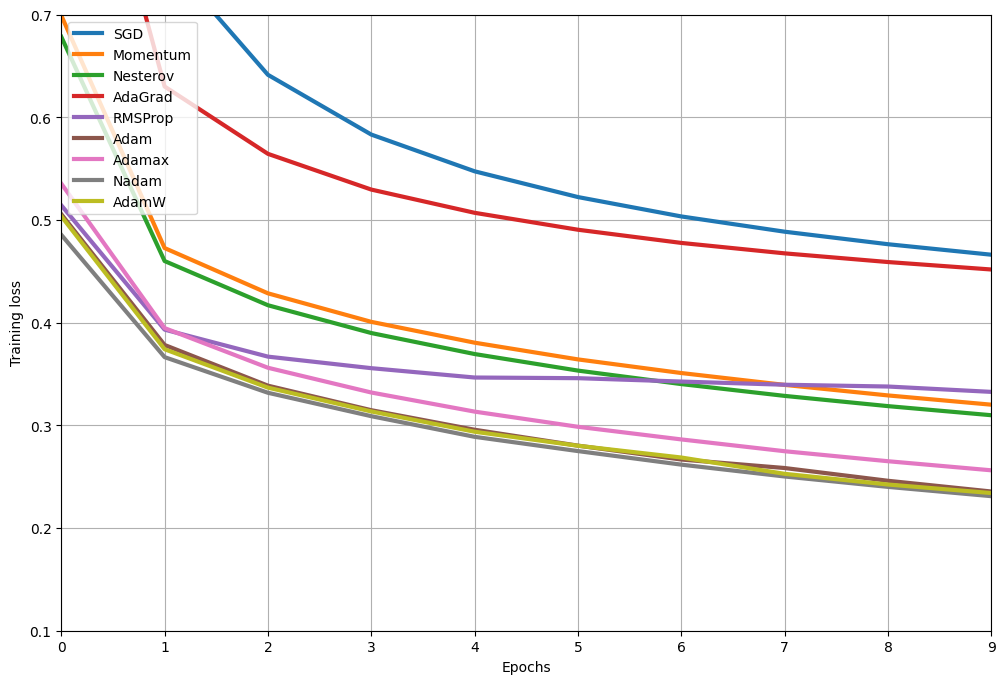

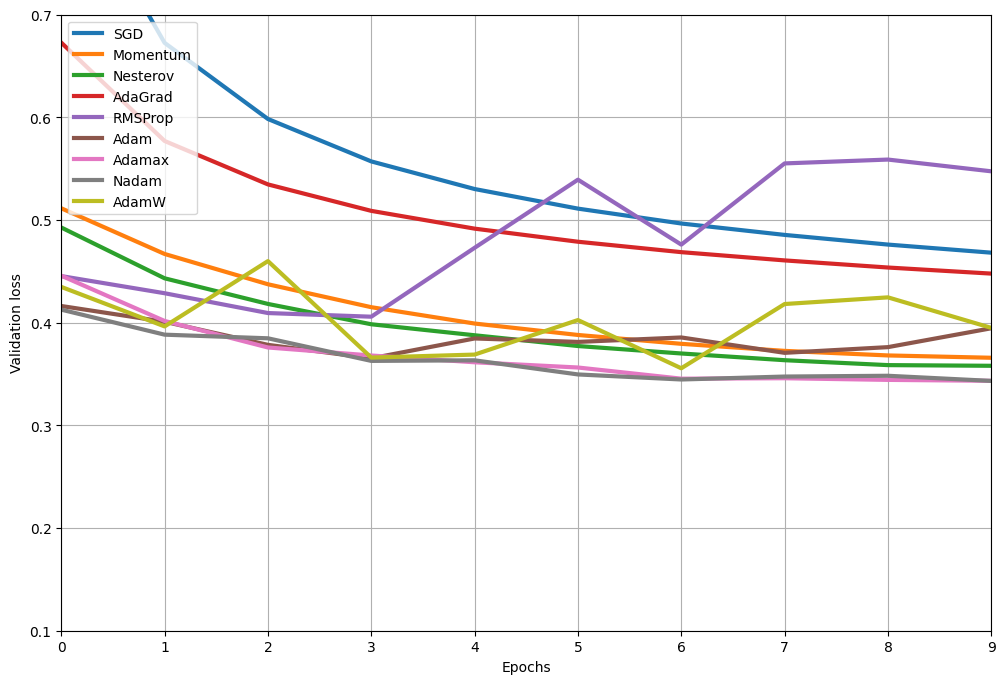

In [64]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [68]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [69]:
history_power_scheduling = build_and_train_model(optimizer)

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7638 - loss: 0.6844 - val_accuracy: 0.8244 - val_loss: 0.4998
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8307 - loss: 0.4800 - val_accuracy: 0.8374 - val_loss: 0.4543
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8455 - loss: 0.4351 - val_accuracy: 0.8448 - val_loss: 0.4322
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8546 - loss: 0.4091 - val_accuracy: 0.8496 - val_loss: 0.4187
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.3913 - val_accuracy: 0.8550 - val_loss: 0.4071
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8655 - loss: 0.3779 - val_accuracy: 0.8582 - val_loss: 0.3968
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3674 - val_accuracy: 0.8610 - val_loss: 0.3888
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8723 - loss: 0.3586 - 

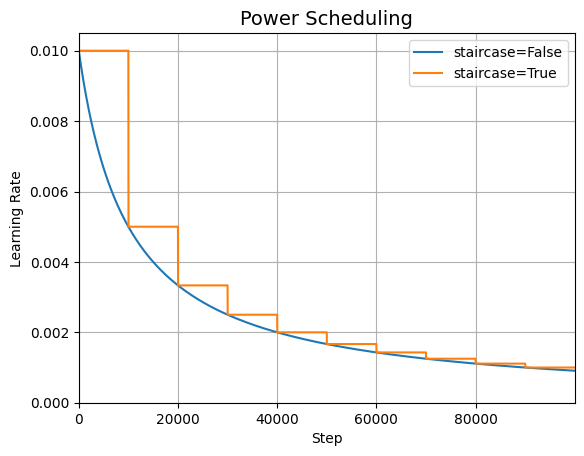

In [70]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [71]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [72]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10


c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7575 - loss: 0.7185 - val_accuracy: 0.8248 - val_loss: 0.5025
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8336 - loss: 0.4779 - val_accuracy: 0.8376 - val_loss: 0.4587
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8479 - loss: 0.4336 - val_accuracy: 0.8454 - val_loss: 0.4381
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8564 - loss: 0.4089 - val_accuracy: 0.8472 - val_loss: 0.4233
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.3919 - val_accuracy: 0.8498 - val_loss: 0.4111
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3796 - val_accuracy: 0.8540 - val_loss: 0.3997
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8689 - loss: 0.3702 - val_accuracy: 0.8570 - val_loss: 0.3914
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3629 - val_accurac

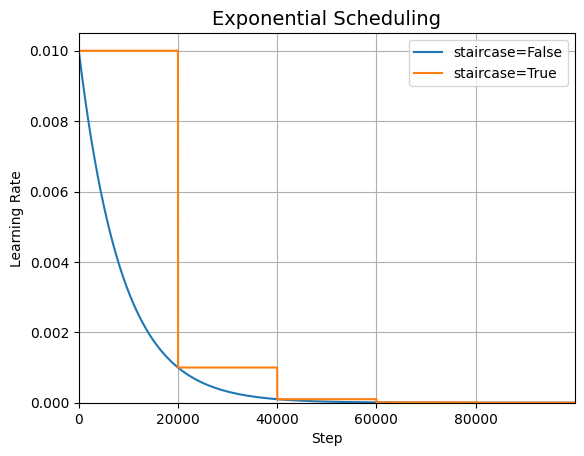

In [73]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [75]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01,s=20)

In [76]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7656 - loss: 0.6895 - val_accuracy: 0.8316 - val_loss: 0.4819 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8347 - loss: 0.4666 - val_accuracy: 0.8384 - val_loss: 0.4451 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.4216 - val_accuracy: 0.8434 - val_loss: 0.4273 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.3956 - val_accuracy: 0.8488 - val_loss: 0.4148 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.3774 - val_accuracy: 0.8506 - val_loss: 0.4019 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3636 - val_accuracy: 0.8554 - val_loss: 0.3885 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - l

In [78]:
def exponential_decay_fn(epoch,lr):
    return lr * 0.1 ** (1/20)